## Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger survived or
not.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
#loading the data
titanic = pd.read_csv("https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Moor, Master. Meier",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


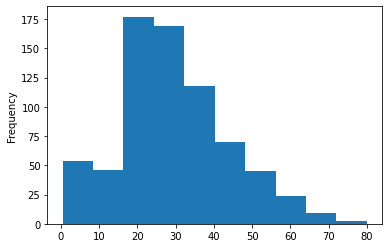

In [7]:
titanic["Age"].plot.hist()

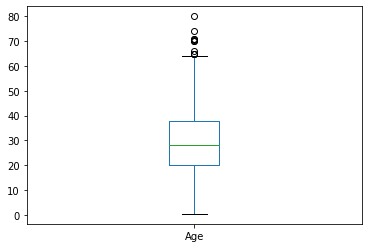

In [8]:
titanic["Age"].plot.box()

## Univariate analysis for categorical variables

In [9]:
#sex, Pclass, embarked
titanic["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

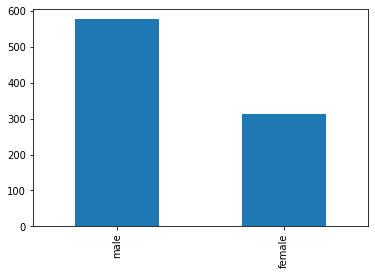

In [10]:
titanic["Sex"].value_counts().plot.bar()

In [11]:
#Count% for the sex class
titanic["Sex"].value_counts()/len(titanic["Sex"])

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [12]:
titanic["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

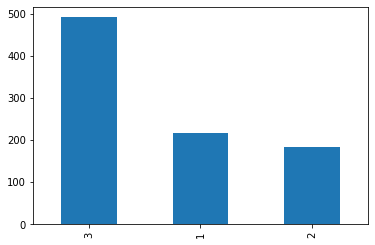

In [13]:
titanic["Pclass"].value_counts().plot.bar()


In [14]:
titanic["Pclass"].value_counts()/len(titanic["Pclass"])

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [15]:
titanic["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

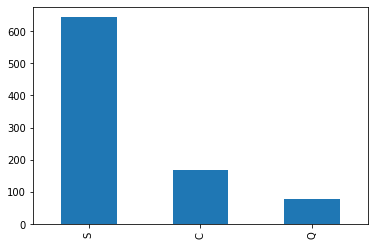

In [16]:
titanic["Embarked"].value_counts().plot.bar()

In [17]:
titanic["Embarked"].value_counts()/len(titanic["Embarked"])

S    0.722783
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64

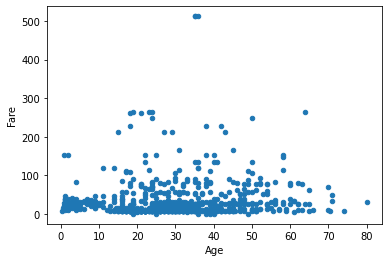

In [18]:
titanic.plot.scatter("Age","Fare")

In [19]:
titanic["Age"].corr(titanic["Fare"])

0.0960666917690389

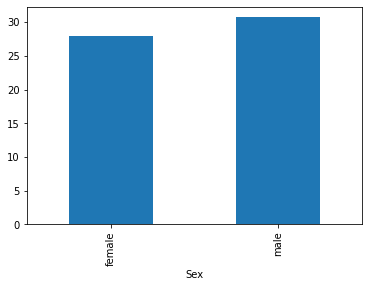

In [20]:
titanic.groupby("Sex")["Age"].mean().plot.bar()

In [21]:
#2-sample t test
from scipy.stats import ttest_ind
males=titanic[titanic["Sex"]=="male"]
females=titanic[titanic["Sex"]=="female"]
ttest_ind(males["Age"],females["Age"],nan_policy="omit")

Ttest_indResult(statistic=2.499206354920835, pvalue=0.012671296797014266)

p_value<0.05, which means that there is a statistical difference between the 2 groups

In [22]:
#categorical-categorical
pd.crosstab(titanic["Sex"],titanic["Survived"])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [23]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(titanic["Sex"],titanic["Survived"]))

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

p_value<0.05, which means that there is a statistical difference between males and females who survived.

##Treating missing values

In [24]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
titanic["Age"].fillna(titanic["Age"].mean(), inplace = True)

In [26]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##Outlier Treatment

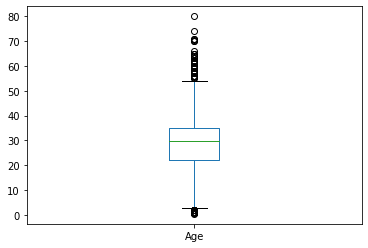

In [27]:
titanic["Age"].plot.box()

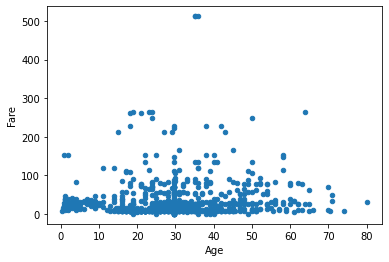

In [28]:
titanic.plot.scatter("Age", "Fare")

In [29]:
#Taking only those observations which do not have outliers
titanic=titanic[titanic['Fare']<300]

In [30]:
#Replacing outliers in Age with mean age value
titanic.loc[titanic['Age']>65,"Age"] = np.mean(titanic['Age'])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


##Variable transformation

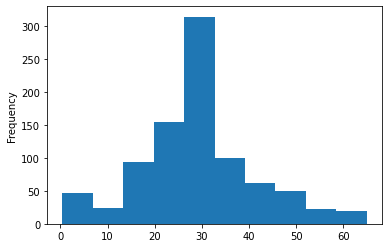

In [31]:
titanic['Age'].plot.hist()

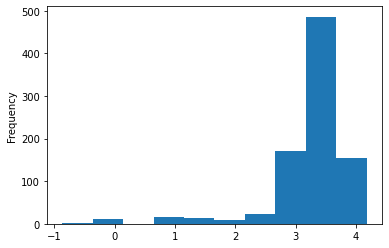

In [32]:
np.log(titanic['Age']).plot.hist()

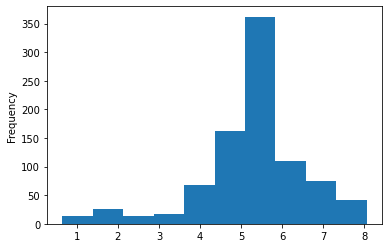

In [33]:
np.sqrt(titanic['Age']).plot.hist()

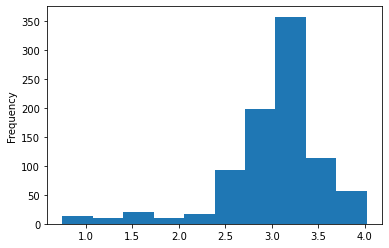

In [34]:
np.power(titanic['Age'],1/3).plot.hist()

##Binning

In [35]:
bins = [0,15,80]
group = ["Children", "Adult"]
titanic["Type"] = pd.cut(titanic["Age"],bins,labels=group)
titanic.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


In [36]:
titanic["Type"].value_counts()

Adult       805
Children     83
Name: Type, dtype: int64

In [37]:
data = titanic[['Pclass','Sex', 'Age', 'SibSp','Parch', 'Fare']]
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [38]:
data = pd.get_dummies(data, columns=['Sex'])
data.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,1


In [39]:
X = data
y = titanic["Survived"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,stratify= y) #stratify keeps the proportion of 1's and 0's equal in train & test data set while splitting

In [41]:
X_train.value_counts()/len(X_train)

Pclass  Age        SibSp  Parch  Fare      Sex_female  Sex_male
3       29.699118  0      0      7.8958    0           1           0.018018
                                 8.0500    0           1           0.015015
                                 7.7500    1           0           0.010511
2       29.699118  0      0      0.0000    0           1           0.009009
3       29.699118  0      0      7.2292    0           1           0.009009
                                                                     ...   
        22.000000  0      0      7.2500    0           1           0.001502
                                 7.5208    0           1           0.001502
                                 7.7958    0           1           0.001502
                                 9.0000    0           1           0.001502
1       0.920000   1      2      151.5500  0           1           0.001502
Length: 582, dtype: float64

##Decision Tree classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf.score(X_train, y_train)

0.9834834834834835

In [44]:
py_pred = clf.predict(X_test)

In [45]:
# accuracy of our classification tree
clf.score(X_test,y_test)

0.7882882882882883

Let's now try to tune some hyperparameters using the GridSearchCV algorithm. We have studied about CrossValidation in upcoming lecture.

GridSearchCV is a method used to tune our hyperparameters. We can pass different values of hyperparameters as parameters for grid search. It does a exhaustive generation of combination of different parameters passed. Using cross validation score, Grid Search returns the combination of hyperparameters for which the model is performing the best.

In [46]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [47]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [48]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [49]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 6, 'splitter': 'random'}


In [50]:
grid_search.best_score_

0.8333408147233756

In [51]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth =15, min_samples_leaf= 3, min_samples_split= 6, splitter ='random')
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [52]:
clf.score(X_test,y_test)

0.7747747747747747

Let's use the standard scaler to check if it helps in optimizing the score

In [53]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

X_transform = scalar.fit_transform(X)

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X_transform,y,test_size = 0.30, random_state= 355)

In [59]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7752808988764045

In [56]:
#grid_search.fit(X_train,y_train)

In [57]:
# best_parameters = grid_search.best_params_
# print(best_parameters)